In [55]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Create a path to the csv and read it into a Pandas DataFrame for Poverty Rate Data
csv_path = "CountyPovertyRate.csv"
county_pov_df = pd.read_csv(csv_path)

county_pov_df.head()

,Rank,County,Poverty Rate,Urban/Rural/Sub
0,1st,Carver County,4.00%,Suburban
1,2nd,Washington County,5.00%,Suburban
2,3rd,Wright County,5.00%,Suburban
3,4th,Chisago County,5.40%,Rural
4,5th,Scott County,5.60%,Suburban


In [57]:
#Create path to csv for uranium 2017 data and read into Pandas Dataframe
csv_path = "uranium_2017.csv"
uranium2017_df= pd.read_csv(csv_path)

uranium2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips,Unnamed: 11
0,1020034,2017.0,Uranium,Andover,Anoka,Andover,Groundwater,0.33 pCi/L (ND),0.33 pCi/L (ND),19918.0,27003.0,NaN
1,1020001,2017.0,Uranium,Anoka,Anoka,Anoka,Groundwater,0.34 pCi/L (ND),0.34 pCi/L (ND),17995.0,27003.0,NaN
2,1020011,2017.0,Uranium,Village Green North Mobile Home Park,Anoka,Cedar,Groundwater,0.19 pCi/L,0.19 pCi/L,450.0,27003.0,NaN
3,1020017,2017.0,Uranium,Coon Rapids,Anoka,Coon Rapids,Groundwater,0.33 pCi/L (ND),0.33 pCi/L (ND),61481.0,27003.0,NaN
4,1020042,2017.0,Uranium,East Bethel,Anoka,East Bethel,Groundwater,0.73 pCi/L,0.97 pCi/L,137.0,27003.0,NaN


In [58]:
#verify data types in pandas database for uranium
uranium2017_df.dtypes

pwsId                object
year                float64
analyteCode          object
pwsName              object
countyServed         object
cityServed           object
waterSource          object
mean                 object
max                  object
populationServed    float64
fips                float64
Unnamed: 11         float64
dtype: object

In [59]:
#delete the empty column on the end named "Unnamed:11"
uranium2017_df=uranium2017_df.drop(columns=['Unnamed: 11'])
uranium2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1020034,2017.0,Uranium,Andover,Anoka,Andover,Groundwater,0.33 pCi/L (ND),0.33 pCi/L (ND),19918.0,27003.0
1,1020001,2017.0,Uranium,Anoka,Anoka,Anoka,Groundwater,0.34 pCi/L (ND),0.34 pCi/L (ND),17995.0,27003.0
2,1020011,2017.0,Uranium,Village Green North Mobile Home Park,Anoka,Cedar,Groundwater,0.19 pCi/L,0.19 pCi/L,450.0,27003.0
3,1020017,2017.0,Uranium,Coon Rapids,Anoka,Coon Rapids,Groundwater,0.33 pCi/L (ND),0.33 pCi/L (ND),61481.0,27003.0
4,1020042,2017.0,Uranium,East Bethel,Anoka,East Bethel,Groundwater,0.73 pCi/L,0.97 pCi/L,137.0,27003.0


In [60]:
#verify any empty data cells
uranium2017_df['mean'].isnull().sum()

10

In [61]:
#verify what is in the empty data cells
nullData=uranium2017_df.loc[uranium2017_df['mean'].isnull()]
nullData

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
138,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,Minnesota Public Health Data Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Minnesota Environmental Public Health Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,Minnesota Department of Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,P.O. Box 64882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,"St. Paul, MN 55164-0882",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,Phone: (651) 201-5900 or toll free: 1-800-205-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Fax: (651) 201-5926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,E-mail: tracking.health@state.mn.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Web: http://health.mn.gov/mndata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#delete the null data and confirm no more NaN
uranium2017_df=uranium2017_df.dropna()
uranium2017_df['mean'].isnull().sum()

0

In [63]:
#drop concentration string out of contaminate level columns "mean" and "max"
uranium2017_df['mean']=uranium2017_df['mean'].str.split(" ").str[0]
uranium2017_df['max']=uranium2017_df['max'].str.split(" ").str[0]
uranium2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1020034,2017.0,Uranium,Andover,Anoka,Andover,Groundwater,0.33,0.33,19918.0,27003.0
1,1020001,2017.0,Uranium,Anoka,Anoka,Anoka,Groundwater,0.34,0.34,17995.0,27003.0
2,1020011,2017.0,Uranium,Village Green North Mobile Home Park,Anoka,Cedar,Groundwater,0.19,0.19,450.0,27003.0
3,1020017,2017.0,Uranium,Coon Rapids,Anoka,Coon Rapids,Groundwater,0.33,0.33,61481.0,27003.0
4,1020042,2017.0,Uranium,East Bethel,Anoka,East Bethel,Groundwater,0.73,0.97,137.0,27003.0


In [64]:
#rename column headers for contaminates to include concentrations so the information isn't lost
uranium2017_df=uranium2017_df.rename(columns={"mean":"Mean pCi/L (ND)", "max":"Max pCi/L (ND)"})
uranium2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,Mean pCi/L (ND),Max pCi/L (ND),populationServed,fips
0,1020034,2017.0,Uranium,Andover,Anoka,Andover,Groundwater,0.33,0.33,19918.0,27003.0
1,1020001,2017.0,Uranium,Anoka,Anoka,Anoka,Groundwater,0.34,0.34,17995.0,27003.0
2,1020011,2017.0,Uranium,Village Green North Mobile Home Park,Anoka,Cedar,Groundwater,0.19,0.19,450.0,27003.0
3,1020017,2017.0,Uranium,Coon Rapids,Anoka,Coon Rapids,Groundwater,0.33,0.33,61481.0,27003.0
4,1020042,2017.0,Uranium,East Bethel,Anoka,East Bethel,Groundwater,0.73,0.97,137.0,27003.0


In [65]:
#convert contaminate columns from object to integer, confirm data type in columns
uranium2017_df["Mean pCi/L (ND)"] = pd.to_numeric(uranium2017_df["Mean pCi/L (ND)"])
uranium2017_df["Max pCi/L (ND)"] = pd.to_numeric(uranium2017_df["Max pCi/L (ND)"])

#covert year to string
uranium2017_df["year"] = uranium2017_df["year"].astype(str)
print(uranium2017_df.dtypes)



pwsId                object
year                 object
analyteCode          object
pwsName              object
countyServed         object
cityServed           object
waterSource          object
Mean pCi/L (ND)     float64
Max pCi/L (ND)      float64
populationServed    float64
fips                float64
dtype: object


In [66]:
#convert county columns of the two data frames to match each other for a future merge
uranium2017_df=uranium2017_df.rename(columns={"countyServed" : "County"})
county_pov_df['County']=county_pov_df['County'].str.split(" County").str[0]

In [67]:
#average mean concentration for each county
county_grouped = uranium2017_df.groupby(["County"]) 
mean_concentration = county_grouped.mean()["Mean pCi/L (ND)"]

In [68]:
#Create new data frame from mean concentration
ByCounty_df = pd.DataFrame(mean_concentration)
ByCounty_df = ByCounty_df.reset_index()
ByCounty_df.head()

,County,Mean pCi/L (ND)
0,Anoka,0.408182
1,Blue Earth,5.156667
2,Brown,0.340000
3,Carver,0.572000
4,Cass,0.500000


In [69]:
#calculate standard deviation for concentration for each county. Add to new dataframe
county_grouped = uranium2017_df.groupby(["County"]) 
sd_concentration = county_grouped.std()["Mean pCi/L (ND)"]

ByCounty1_df = pd.DataFrame(sd_concentration)
ByCounty1_df = ByCounty1_df.reset_index()
ByCounty1_df = ByCounty1_df.rename(columns = {"Mean pCi/L (ND)":"Standard Deviation pCi/L (ND)"})
ByCounty1_df.head()

,County,Standard Deviation pCi/L (ND)
0,Anoka,0.180156
1,Blue Earth,9.286430
2,Brown,NaN
3,Carver,0.208974
4,Cass,NaN


In [70]:
#merge the mean and standard deviation into the same data frame
avg_df = pd.merge(ByCounty_df,ByCounty1_df, on = "County", how = "inner")
avg_df.head()

,County,Mean pCi/L (ND),Standard Deviation pCi/L (ND)
0,Anoka,0.408182,0.180156
1,Blue Earth,5.156667,9.286430
2,Brown,0.340000,NaN
3,Carver,0.572000,0.208974
4,Cass,0.500000,NaN


In [71]:
#merge mean/std dataframe with poverty rate data
county_combined = pd.merge(avg_df,county_pov_df, on = "County", how = "inner")
county_combined.head()

,County,Mean pCi/L (ND),Standard Deviation pCi/L (ND),Rank,Poverty Rate,Urban/Rural/Sub
0,Anoka,0.408182,0.180156,9th,6.60%,Suburban
1,Blue Earth,5.156667,9.286430,85th,18.10%,Rural
2,Brown,0.340000,NaN,16th,8.10%,Rural
3,Carver,0.572000,0.208974,1st,4.00%,Suburban
4,Cass,0.500000,NaN,78th,15.30%,Rural


In [72]:
#modify Poverty Rate column to be integer so it can be binned
county_combined['Poverty Rate']=county_combined['Poverty Rate'].str.split("%").str[0]
county_combined['Poverty Rate'] = pd.to_numeric(county_combined['Poverty Rate'])
county_combined = county_combined.rename(columns = {"Poverty Rate":"Poverty Rate (%)"})
county_combined.head()

,County,Mean pCi/L (ND),Standard Deviation pCi/L (ND),Rank,Poverty Rate (%),Urban/Rural/Sub
0,Anoka,0.408182,0.180156,9th,6.6,Suburban
1,Blue Earth,5.156667,9.286430,85th,18.1,Rural
2,Brown,0.340000,NaN,16th,8.1,Rural
3,Carver,0.572000,0.208974,1st,4.0,Suburban
4,Cass,0.500000,NaN,78th,15.3,Rural


In [73]:
#sort counties into 5 equal bins by poverty rate
bins = [0,8,10,11.55,13.4,24]
#will come back later for naming 
bin_names = ["1","2","3","4","5"]

county_combined["Bin Poverty Rate"] = pd.cut(county_combined["Poverty Rate (%)"],bins, labels = bin_names)
county_combined.head()

,County,Mean pCi/L (ND),Standard Deviation pCi/L (ND),Rank,Poverty Rate (%),Urban/Rural/Sub,Bin Poverty Rate
0,Anoka,0.408182,0.180156,9th,6.6,Suburban,1
1,Blue Earth,5.156667,9.286430,85th,18.1,Rural,5
2,Brown,0.340000,NaN,16th,8.1,Rural,2
3,Carver,0.572000,0.208974,1st,4.0,Suburban,1
4,Cass,0.500000,NaN,78th,15.3,Rural,5


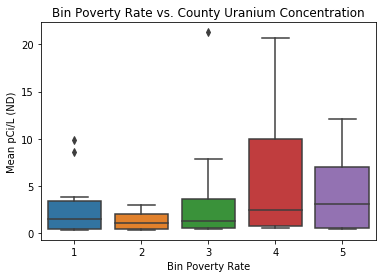

In [74]:
#graph boxplot of poverty rate vs. bin poverty rate
ax=sns.boxplot(x=county_combined["Bin Poverty Rate"], y=county_combined["Mean pCi/L (ND)"])
ax.axes.set_title("Bin Poverty Rate vs. County Uranium Concentration")
plt.savefig("boxplot_uranium2017.png")
plt.show()

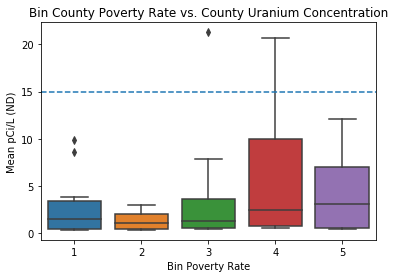

In [75]:
#The highest level of a contaminant that the EPA allows in public drinking water systems. 
#The EPA sets MCLs at levels that are economically and technologically feasible.
#Arsenic: 15 picocuries per liter (pCi/L)
ax=sns.boxplot(x=county_combined["Bin Poverty Rate"], y=county_combined["Mean pCi/L (ND)"])
ax.axes.set_title("Bin County Poverty Rate vs. County Uranium Concentration")
ax.axhline(15, ls='--')
plt.savefig("boxplot_line_uranium2017.png")
plt.show()

Correlation between Poverty Rate % vs. Uranium Mean pCi/L


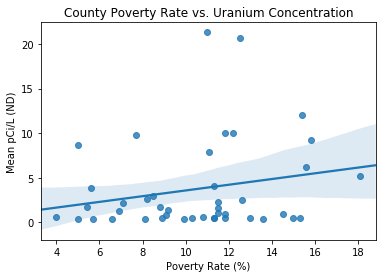

In [76]:
#plotting poverty rate vs. mean nitrate concentration to see if there is a correlation
ax = sns.regplot(x=county_combined["Poverty Rate (%)"], y=county_combined["Mean pCi/L (ND)"])
ax.axes.set_title("County Poverty Rate vs. Uranium Concentration")

#using function to calculate correlation factor
print("Correlation between Poverty Rate % vs. Uranium Mean pCi/L")
county_combined["Poverty Rate (%)"].corr(county_combined["Mean pCi/L (ND)"])

plt.savefig("regression_uranium2017.png")
plt.show()

Correlation between Poverty Rate % vs. Uranium Mean pCi/L
0.21223460530108415


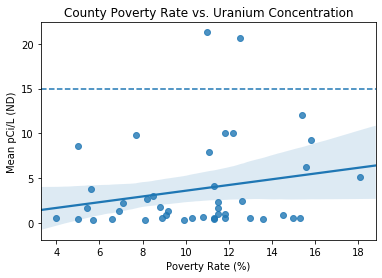

In [79]:
#plotting poverty rate vs. mean nitrate concentration to see if there is a correlation
ax = sns.regplot(x=county_combined["Poverty Rate (%)"], y=county_combined["Mean pCi/L (ND)"])
ax.axes.set_title("County Poverty Rate vs. Uranium Concentration")

#using function to calculate correlation factor
print("Correlation between Poverty Rate % vs. Uranium Mean pCi/L")
print(county_combined["Poverty Rate (%)"].corr(county_combined["Mean pCi/L (ND)"]))
ax.axhline(15, ls='--')

plt.savefig("regression_line_uranium2017.png")
plt.show()

In [78]:
#sort mean concentration to see which counties have limits above the EPA limit
county_combined.sort_values('Mean pCi/L (ND)', ascending=False)

,County,Mean pCi/L (ND),Standard Deviation pCi/L (ND),Rank,Poverty Rate (%),Urban/Rural/Sub,Bin Poverty Rate
32,Rock,21.300000,0.000000,39th,11.0,Rural,3
42,Yellow Medicine,20.700000,NaN,65th,12.5,Rural,4
35,St. Louis,12.055000,16.327096,79th,15.4,Rural,5
39,Watonwan,10.010000,10.451038,62nd,12.2,Rural,4
28,Pipestone,10.000000,NaN,57th,11.8,Rural,4
17,Jackson,9.830000,NaN,13th,7.7,Rural,1
24,Nobles,9.250000,12.374369,82nd,15.8,Rural,5
38,Washington,8.640000,NaN,2nd,5.0,Suburban,1
5,Chippewa,7.865000,8.676200,41st,11.1,Rural,3
7,Cottonwood,6.250000,8.131728,81st,15.6,Rural,5
